In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

In [2]:
def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1**2
    s2 += g2**2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

In [3]:
def f_2d(x1, x2):
    return 0.1 * x1**2 + 2 * x2**2

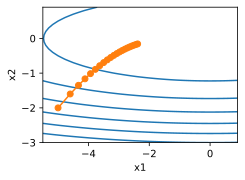

In [4]:
eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

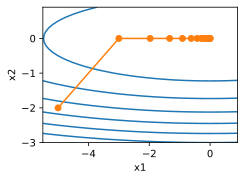

In [5]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

In [6]:
def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

In [7]:
def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.242, 0.008 sec/epoch


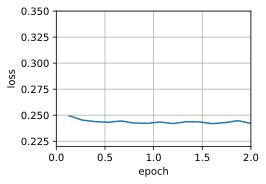

In [8]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim), {'lr': 0.1}, data_iter, feature_dim);

loss: 0.242, 0.007 sec/epoch


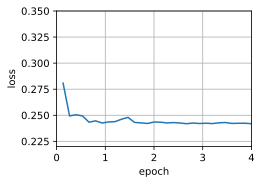

In [9]:
trainer = torch.optim.Adagrad
d2l.train_concise_ch11(trainer, {'lr': 0.1}, data_iter)